<a href="https://colab.research.google.com/github/gimangwai-tech/PENGOLAHAN-CITRA-DIGITAL-Semester-5/blob/main/Tugas_Minggu_4_Negative%2C_Gamma_dan_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

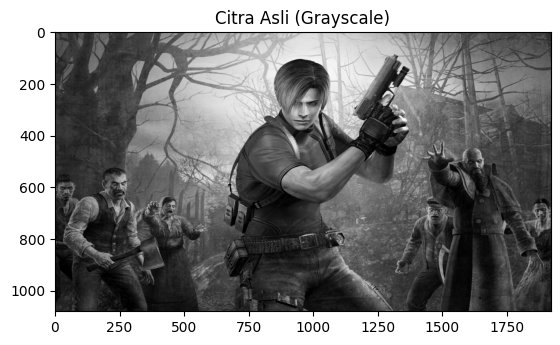

In [33]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
img = cv2.imread('leon.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.show()




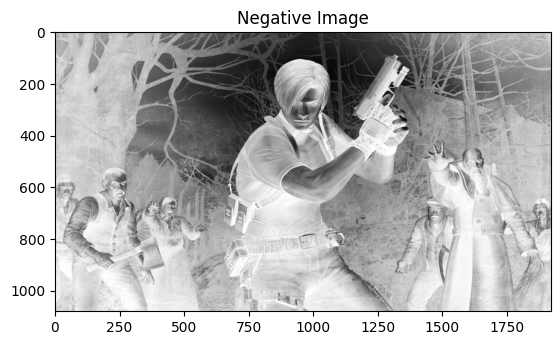

In [34]:
negative = 255 - img
plt.imshow(negative, cmap='gray')
plt.title('Negative Image')
plt.show()

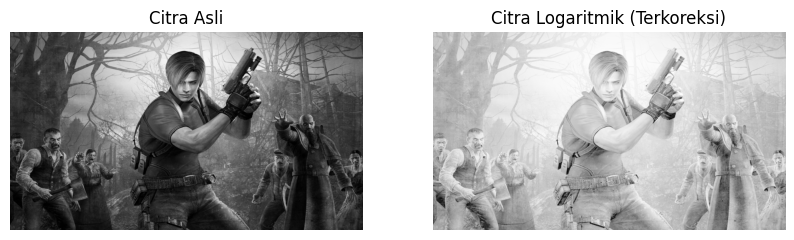

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
img = cv2.imread('leon.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Gambar tidak ditemukan!")

# Ubah ke float agar tidak hilang presisi
img_float = img.astype(float)

# Rumus log transformasi
c = 255 / np.log(1 + np.max(img_float))
log_transform = c * np.log(1 + img_float)

# Normalisasi hasil ke 0–255
log_transform = cv2.normalize(log_transform, None, 0, 255, cv2.NORM_MINMAX)

# Ubah ke uint8 untuk ditampilkan
log_transform = np.uint8(log_transform)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Citra Asli')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra Logaritmik (Terkoreksi)')
plt.imshow(log_transform, cmap='gray')
plt.axis('off')

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

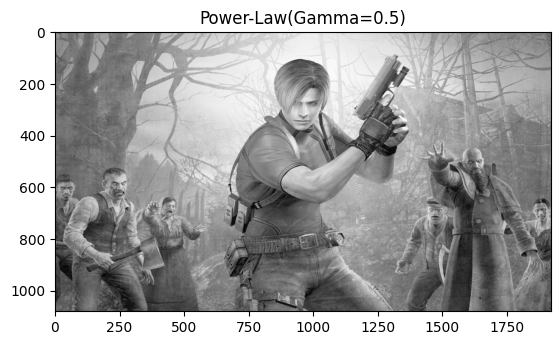

In [36]:
gamma = 0.5 # Ubah nilai gamma = 0.4, 0.6, 1.2, dst untuk eksperimen
c = 1
power_law = c * np.power(img / 255.0, gamma)
power_law = np.uint8(power_law * 255)

plt.imshow(power_law, cmap='gray')
plt.title(f'Power-Law(Gamma={gamma})')
plt.show

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Membaca gambar grayscale
img = cv2.imread('leon.jpg', cv2.IMREAD_GRAYSCALE)

#Definisi kernel (contoh sharpering)
kernel = np.array([[0, -1, 0]
                  [-1, 5, -1]
                  [0, -1, 0]])

#Operasi konvololusi
conv = cv2.filter2D(img, -1, kernel)

#Tamplian Hasil
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Asli')
plt.subplot(1,2,2), plt.imshow(conv, cmap='gray'), plt.tilte('Hasil Konvolusi (Sharpen)')
plt.show

<>:9: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:9: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipython-input-3318623103.py:9: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  kernel = np.array([[0, -1, 0]


TypeError: list indices must be integers or slices, not tuple